Total training samples: 74864
Samples per class: 449


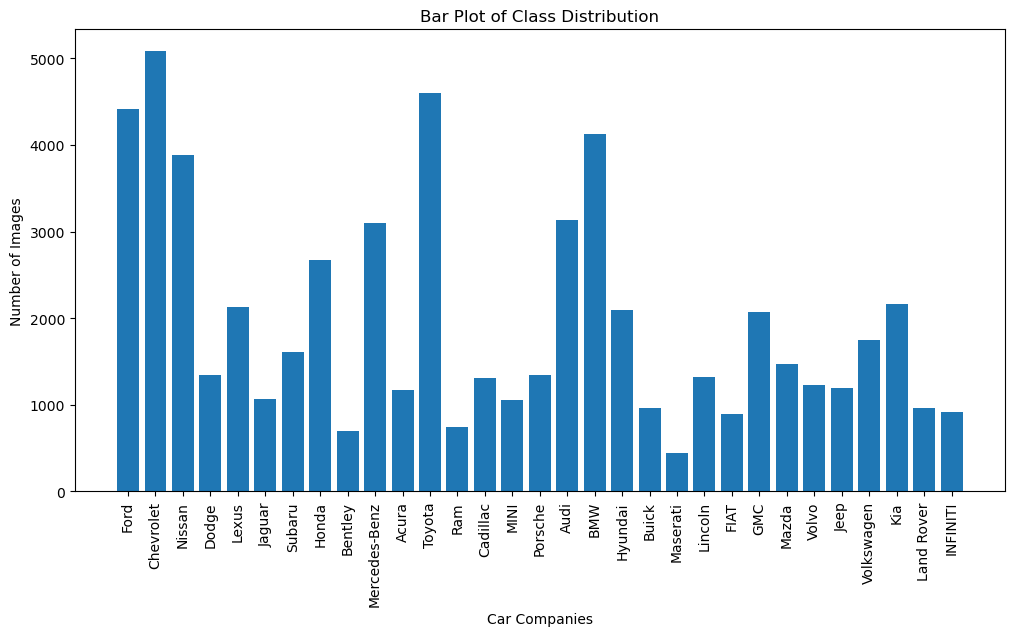

In [2]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

# Datadir = 'C:/Users/mukun/Documents/GitHub/Car-Make-Predictor-CNN/archive'
Datadir = '/Users/mukund/Documents/GitHub/Car-Make-Predictor-CNN/archive'
All_images = os.listdir(Datadir)
All_images = [image for image in All_images if image.endswith(".jpg")]
image_size = 100
training_data = []

def create_dictionary(all_images_names):
    name_dict = {}
    index = 0

    for image in all_images_names:
        car_company = image.split("_")[0]

        if car_company not in name_dict:
            name_dict[car_company] = index
            index += 1
    return name_dict

car_dict = create_dictionary(All_images)

class_counts = {}
for img in All_images:
    compnay_name = img.split("_")[0]
    class_name = car_dict[compnay_name]
    if class_name not in class_counts:
        class_counts[class_name] = 0
    class_counts[class_name] += 1

min_count = min(class_counts.values())

def create_training_data():
    class_samples = {class_name: [] for class_name in class_counts.keys()}
    for img in All_images:
        compnay_name = img.split("_")[0]
        class_name = car_dict[compnay_name]
        try:
            img_array = cv2.imread(os.path.join(Datadir, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (image_size, image_size))
            training_data.append([new_array, class_name])
            class_samples[class_name].append([new_array, class_name])
        except Exception as e:
            pass
    for class_name, samples in class_samples.items():
        random.shuffle(samples)
        training_data.extend(samples[:min_count])

create_training_data()
print(f'Total training samples: {len(training_data)}')
print(f'Samples per class: {min_count}')

# Extract class labels from training data
class_labels = [sample[1] for sample in training_data]

# Plotting the bar plot for the distribution of classes
plt.figure(figsize=(12, 6))
sorted_counts = dict(sorted(class_counts.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xticks(ticks=range(len(sorted_counts)), labels=[list(car_dict.keys())[i] for i in sorted_counts.keys()], rotation=90)
plt.title('Bar Plot of Class Distribution')
plt.xlabel('Car Companies')
plt.ylabel('Number of Images')
plt.show()

keys_list = list(car_dict.keys())

In [3]:
import random 
import seaborn as sns
from tensorflow.keras.utils import to_categorical

random.shuffle(training_data)

X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1, image_size, image_size, 1)
X = X / 255.0
y = np.array(y)
y = to_categorical(y)

In [4]:
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = len(keys_list)

#Optimizing the model

dense_layers = [0, 1, 2]
layers_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]


model = Sequential()
model.add(Conv2D(32, (3,3), padding = "same", input_shape = X.shape[1:]))
model.add(Activation("sigmoid"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), padding = "same"))
model.add(Activation("sigmoid"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['categorical_accuracy'])
model.fit(X, y, batch_size = 32, epochs = 5, validation_split = 0.2)


# for dense_layer in dense_layers:
#     for layer_size in layers_sizes:
#         for conv_layer in conv_layers:
#             NAME = "{}-CONV-{}-NODES-{}-DENSE-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
#             tensorboard_callback = TensorBoard(log_dir=f"Logs/{NAME}")
#             print(NAME)
            
#             model = Sequential()
#             model.add(Conv2D(layer_size, (3,3), padding="same",input_shape = X.shape[1:]))
#             model.add(Activation("sigmoid"))
#             model.add(BatchNormalization())
#             model.add(MaxPool2D(pool_size=(2,2)))

#             for l in range(conv_layer - 1):
#                 model.add(Conv2D(layer_size, (3,3), padding="same"))
#                 model.add(Activation("sigmoid"))
#                 model.add(BatchNormalization())
#                 model.add(MaxPool2D(pool_size=(2,2)))
                
#             model.add(Flatten())
#             for l in range(dense_layer):
#                 model.add(Dense(layers_sizes))
#                 model.add(Activation('sigmoid'))
                
#             #Output layer
#             model.add(Dense(num_classes))
#             model.add(Activation("softmax"))

#             plot_model(model, to_file=f"Model_Diagram/{NAME}.png", show_shapes=True, show_layer_names=True)
#             model.compile(loss = "categorical_crossentropy", optimizer = RMSprop(), metrics = ['categorical_accuracy'])
#             model.fit(X, y, batch_size = 32, epochs = 5, validation_split = 0.2, callbacks = [tensorboard_callback])
#             break
#         break
#     break

/Users/mukund/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 174s 93ms/step - categorical_accuracy: 0.1912 - loss: 5.5121 - val_categorical_accuracy: 0.4119 - val_loss: 2.3200
Epoch 2/5
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 519s 277ms/step - categorical_accuracy: 0.6747 - loss: 1.2552 - val_categorical_accuracy: 0.5928 - val_loss: 1.7915
Epoch 3/5
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 174s 93ms/step - categorical_accuracy: 0.8304 - loss: 0.6314 - val_categorical_accuracy: 0.6323 - val_loss: 1.9411
Epoch 4/5
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 174s 93ms/step - categorical_accuracy: 0.9061 - loss: 0.3343 - val_categorical_accuracy: 0.6733 - val_loss: 2.1554
Epoch 5/5
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 175s 93ms/step - categorical_accuracy: 0.9443 - loss: 0.1924 - val_categorical_accuracy: 0.6762 - val_loss: 2.6075


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


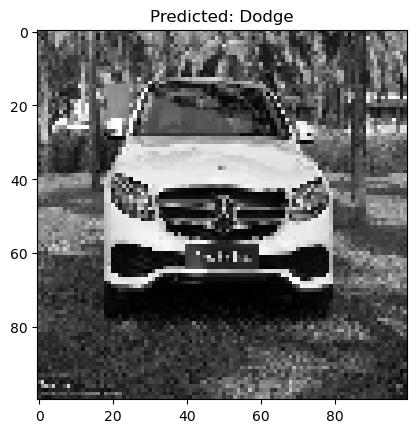

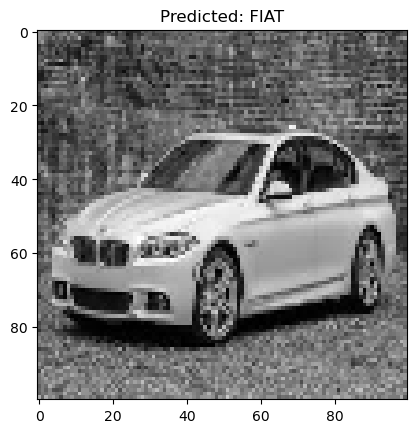

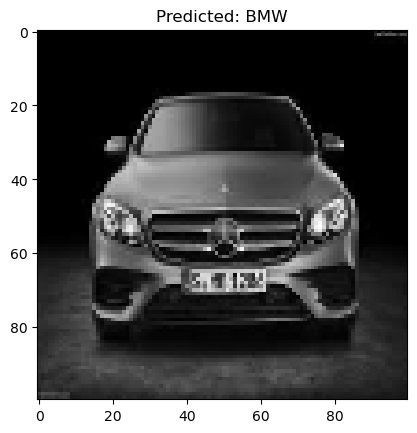

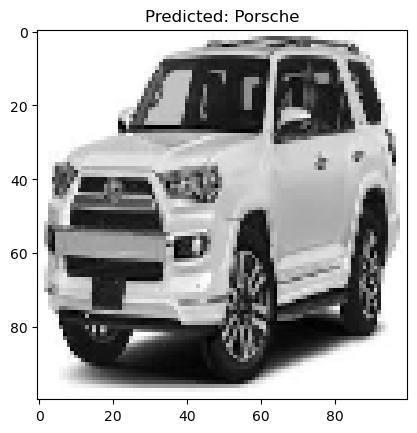

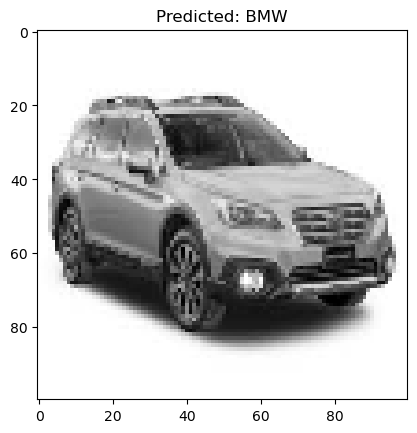

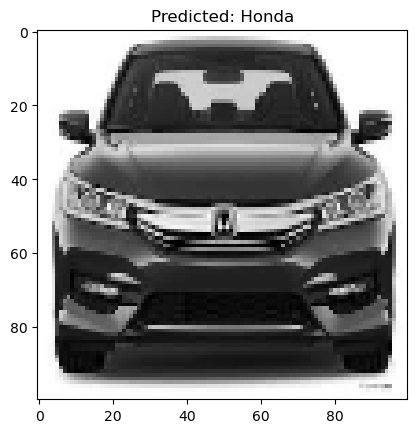

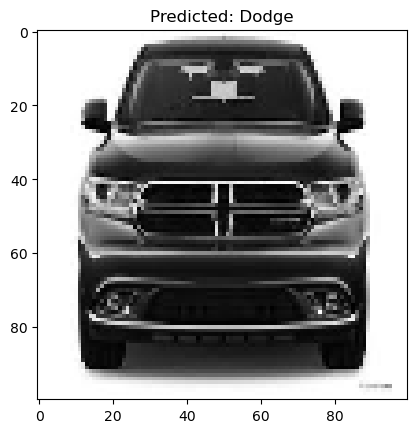

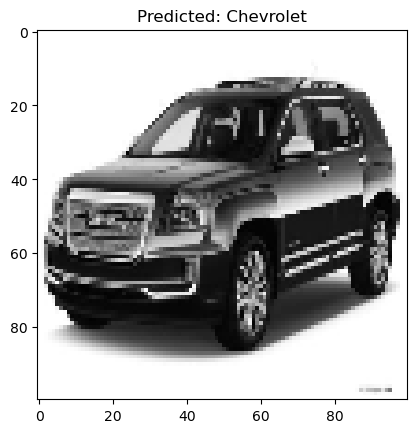

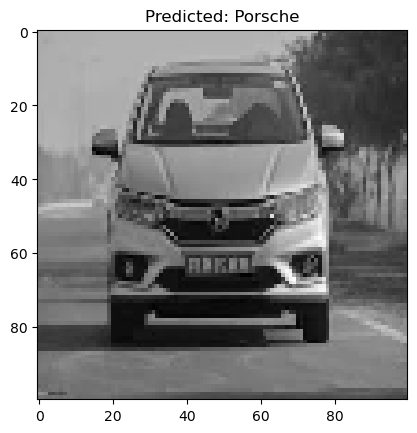

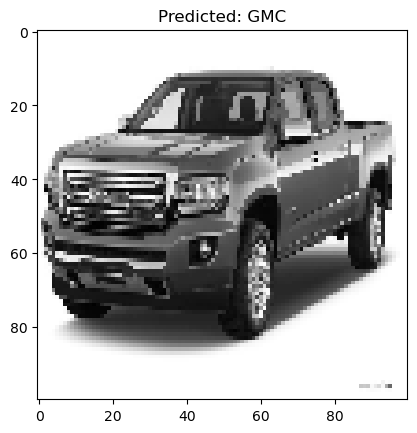

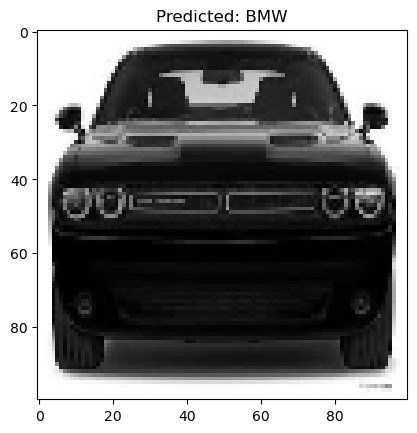

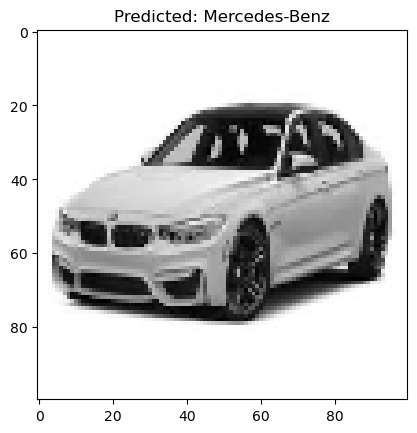

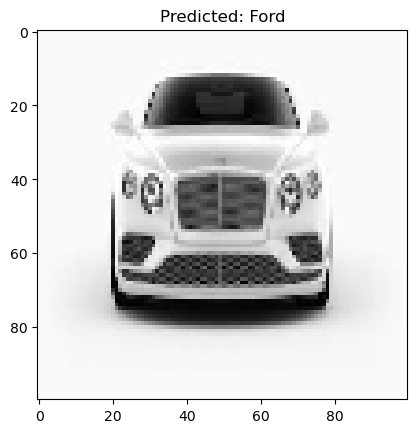

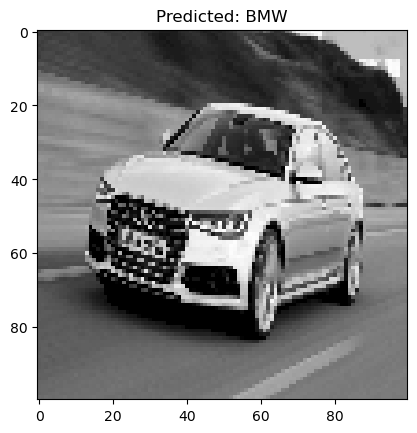

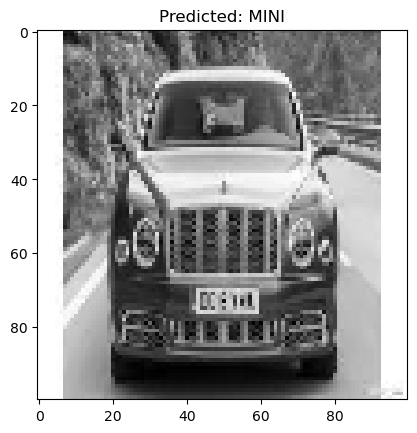

In [5]:
Testing_dir = '/Users/mukund/Documents/GitHub/Car-Make-Predictor-CNN/Sample_Testing'
images = os.listdir(Testing_dir)
testing_images = []
for img in images:
    try:
        img_array = cv2.imread(os.path.join(Testing_dir,img), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, (image_size,image_size))
        testing_images.append(new_img_array)
    except Exception as e:
        pass

testing_images = np.array(testing_images)
testing_images = testing_images / 255.0


y_pred = model.predict(testing_images)

for pred,plot in zip(y_pred,testing_images):
    max_probability = np.argmax(pred)
    plt.imshow(plot, cmap="gray")
    plt.title(f"Predicted: {keys_list[max_probability]}")
    plt.show()